In [1]:
from __future__ import division
from IO import *
from cycler import cycler
import matplotlib as mpl
%matplotlib inline
from numba import autojit

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
# Instantiate classes
cortex = Cortex()
trn = TRN()
gr = GRAPH(cortex)

# styling
gammaColor = '#00cc99'

def xax(gamma, duration):
    x= np.arange(0,(duration-1)/1000,(duration)/1000/len(gamma) )
    return x

@autojit
def resonanceFS(F, tauv=15):
    T = 2000
    dt = 1
    t = np.arange(0, T, dt)
    F = np.logspace(0.5, 2.3, 200)

    res_var = np.empty(len(F), dtype=np.float64)
    b = 2
    for k, f in enumerate(F):
        A = 0.01
        I = A * np.cos(2 * np.pi * f * t / 1000)
        res_v = []
        res_u = []
        u = 0
        t_rest = 0

        # izh neuron model for cortical fast spiking neurons (that burst)
        v = -60
        for i in range(len(t)):
            v += dt / tauv * ((v + 60) * (v + 50) - 20 * u + 8 * I[i])
            u += dt * 0.044 * ((v + 55) - u)
            if v > 25:
                v = -40
                u += 50
            if i * dt > 1500:
                res_v.append(v / A)

        var = np.var(res_v)
        #         var = np.max(res_v)-np.min(res_v)
        res_var[k] = var
    return res_var



In [19]:
# #-------------------------------
# # PARAMS SEARCH
# #-------------------------------
c = cortex
c.N = 100
c.g = 10
c.d1 = 10
c.d2 = 10000
c.d3 = 10
c.initTime()
c.sigma = 60
c.WII = 1400 #2800
c.S = 100
c.model = "gp-izh-subnetworks"
c.glob = 0

# shared weights
c.sG = 10
c.sWII = 10

c.FACT = 1
c.r=0

c.ratio = 15
c.LTD  = 1e-9*4.7e-6 * c.FACT * c.N
c.LTP = c.ratio * c.LTD

c.tauv=15

c.with_currents = True

# for S in np.arange(50,400,50):
#     Parallel(n_jobs=8)(delayed(cortex.runSimulation)(N,0, G, S, d1, d2, d3, before, after, sigma, \
# WII, LTP, LTD) for G in np.linspace(1,9,"8))

sWIIList = [0,10]
sGList = [0,1,5,10,15,20,25]
sGList = np.arange(0,25,2)
LTDList = [1e-9*4.7e-6 * c.FACT * c.N]
taulist = np.arange(15,95,2)

# cortex.runSimulation()

# c.readSimulation()
# gr.plotWeights(tauv = c.tauv)

# for c.d2 in [10000]:
#     for c.sWII in sWIIList:
#         for c.sG in sGList:
#             for c.LTD in LTDList:
#                 c.LTP = c.ratio * c.LTD
#                 Parallel(n_jobs=8)(delayed(c.runSimulation)(i=0, tauv=c.tauv) for c.tauv in taulist)
                    
df = pd.DataFrame(columns = ['tauv', 'd2','sWII', 'sG', 'LTD',
                             'maxBegin', 'argmaxBegin', 'maxEnd', 'argmaxEnd',
                            'f1Begin', 'p1Begin', 'f2Begin', 'p2Begin', 
                             'f1End', 'p1End', 'f2End', 'p2End', 'key'])
# i=0
# for c.tauv in taulist:
#     for c.d2 in [10000]:
#         for c.sWII in sWIIList:
#             for c.sG in sGList:
#                 for c.LTD in LTDList:
#                     c.LTP = c.ratio * c.LTD
#                     print(c.tauv, c.sWII, c.sG)
#                     c.readSimulation()
#                     csd = gr.valCSD()
#                     if c.tauv <=35 and c.sG<=10:
#                         key=-2
#                     elif c.tauv>35 and c.sG<=10:
#                         key=-1
#                     elif c.tauv<=35 and c.sG>10:
#                         key=2
#                     elif c.tauv>35 and c.sG>10:
#                         key=1
#                     else:
#                         key=0
#                     df.loc[i] = [c.tauv, c.d2, c.sWII, c.sG, c.LTD>1e-8, 
#                                  csd['maxBegin'], csd['argmaxBegin'], csd['maxEnd'], csd['argmaxEnd'],
#                                 csd['f1Begin'][0], csd['f1Begin'][1], csd['f2Begin'][0], csd['f2Begin'][1],
#                                 csd['f1End'][0], csd['f1End'][1], csd['f2End'][0], csd['f2End'][1],
#                                 key]
#                     i+=1
# # print(i)
    
# df.to_csv(DIRECTORY+'df-extended8000noplast.csv')


-1   1

-2   2

In [16]:
# df.to_csv(DIRECTORY+'df-extended.csv')

In [28]:
df = pd.read_csv(DIRECTORY+'df-extended8000noplast.csv')

In [29]:
df.head()

,Unnamed: 0,tauv,d2,sWII,sG,LTD,maxBegin,argmaxBegin,maxEnd,argmaxEnd,f1Begin,p1Begin,f2Begin,p2Begin,f1End,p1End,f2End,p2End,key
0,0,15,10000,0,0,False,43.522168,11,14.467527,11,39.980010,27.369151,43.978011,25.544509,39.980010,24.789871,40.979510,25.722674,-2
1,1,15,10000,0,2,False,64.214997,11,65.028866,11,42.978511,22.421191,44.977511,26.392400,41.979010,24.167046,41.979010,25.450480,-2
2,2,15,10000,0,4,False,134.140623,10,89.773343,11,40.979510,25.263278,37.981009,28.573987,44.977511,24.108156,44.977511,24.135804,-2
3,3,15,10000,0,6,False,189.369123,10,138.327349,11,39.980010,26.625793,39.980010,26.146206,42.978511,25.287973,42.978511,24.897635,-2
4,4,15,10000,0,8,False,111.688168,10,154.808687,11,47.976012,22.438548,47.976012,22.968528,42.978511,25.897140,41.979010,26.896076,-2


0

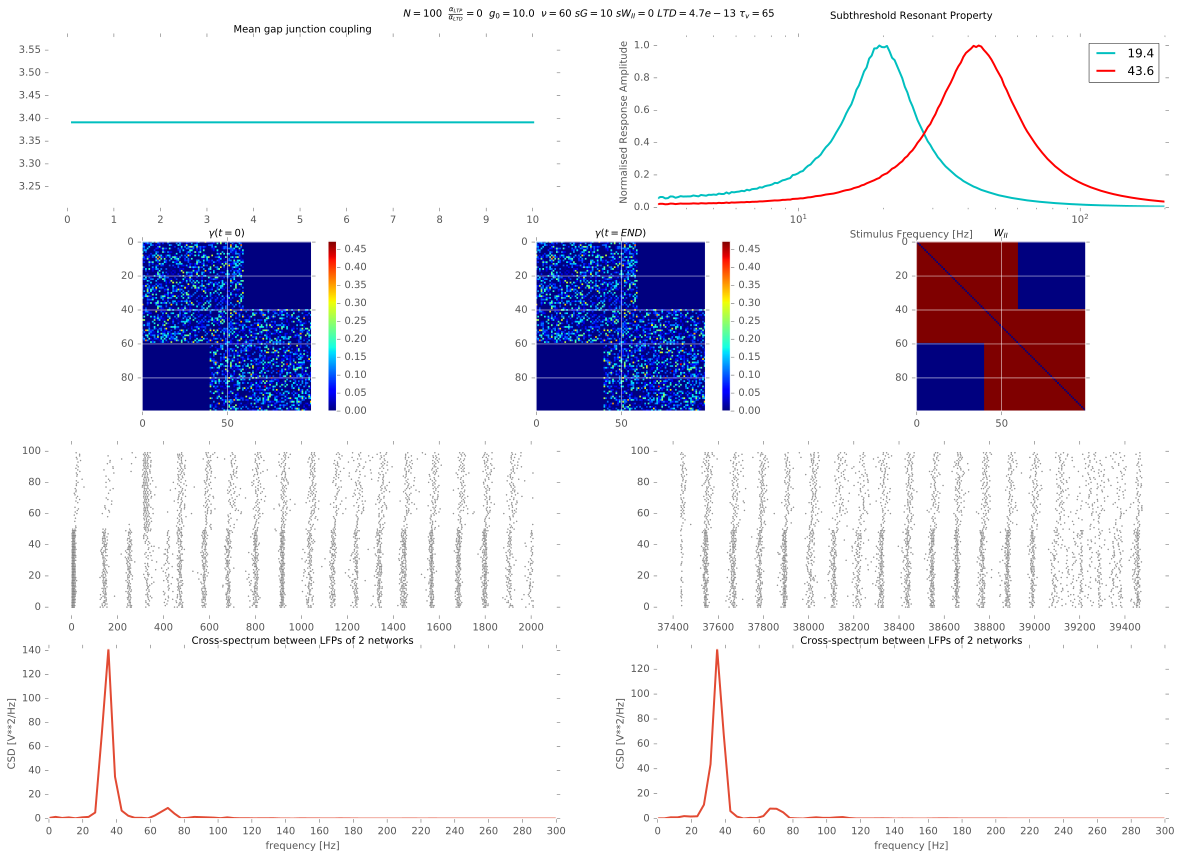

In [20]:
c = cortex
c.with_currents = True
c.g = 10
c.d1 = 10
c.d2 = 10000
c.d3 = 10
c.T = 10020
c.tauv = 65
c.sG=10
c.sWII=0
gr.plotWeights(tauv=c.tauv)

In [30]:
# def plotCoherence(df, sG=0, ax=None, sWII = 10, LTD=True):
#     df_sliced = df[(df['LTD']==LTD) & (df['sG']==sG) & (df['sWII']==sWII)]
#     data = df_sliced[['tauv', 'maxBegin', 'maxEnd']].get_values()
#     if ax is None : 
#         fig = plt.figure(figsize=(4,4))
#         ax = fig.add_subplot(111)
#     im = ax.scatter(np.ones(len(data)), data[:,1], c=np.arange(len(data)))
#     ax.scatter(np.ones(len(data))*2, data[:,2], c=np.arange(len(data)))
#     ax.set_title('peak coherence sG=%d'%sG)
#     ax.set_xticks([1,2])
#     ax.set_xticklabels(['start', 'end'], rotation='vertical')


# def plotArgCoherence(df, sG=0, ax=None, LTD=True):
#     df_sliced = df[(df['LTD']==LTD) & (df['sG']==sG)]
#     data = df_sliced[['tauv', 'argmaxBegin', 'argmaxEnd']].get_values()
#     if ax is None : 
#         fig = plt.figure(figsize=(4,4))
#         ax = fig.add_subplot(111)
#     ax.scatter(np.ones(len(data)), data[:,1], c=np.arange(len(data)))
#     ax.scatter(np.ones(len(data))*2, data[:,2], c=np.arange(len(data)))
#     ax.set_title('peak frequency sG=%d'%sG)
#     ax.set_xticks([1,2])
#     ax.set_xticklabels(['start', 'end'], rotation='vertical')
#     return ax

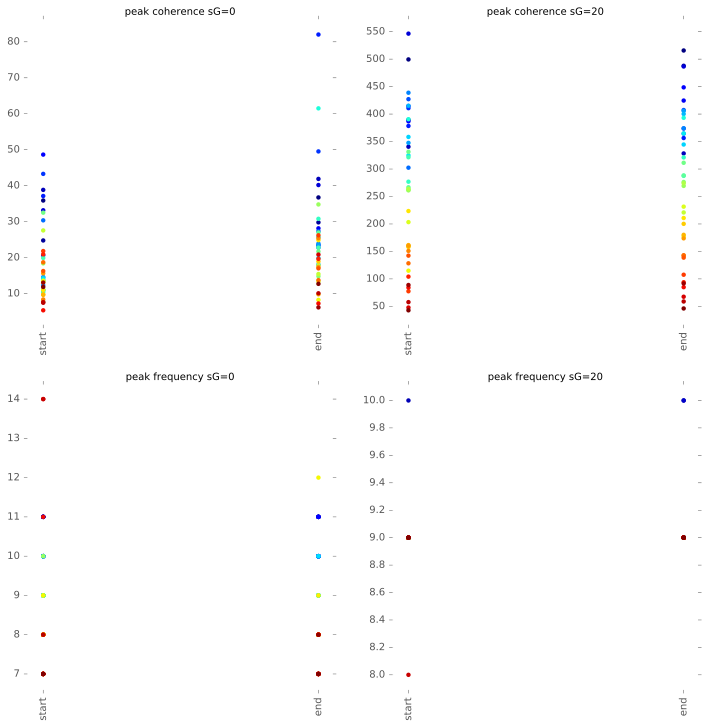

In [32]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
gr.plotCoherence(df,sG=0, ax=ax1, LTD=False)
gr.plotCoherence(df,sG=20, ax=ax2, LTD=False)
gr.plotArgCoherence(df,sG=0, ax=ax3, LTD=False)
gr.plotArgCoherence(df,sG=20, ax=ax4, LTD=False)
plt.savefig(DIRECTORY + 'cor-noplast.png')

In [33]:
# def plotSGCoherence(df, tauv=0, ax=None, sWII=10, LTD=True):
#     df_sliced = df[(df['LTD']==LTD) & (df['tauv']==tauv) & (df['sWII']==sWII)]
#     data = df_sliced[['sG', 'maxBegin', 'maxEnd']].get_values()
#     if ax is None : 
#         fig = plt.figure(figsize=(4,4))
#         ax = fig.add_subplot(111)
#     im = ax.plot(data[:,0], data[:,1], label='start')
#     im = ax.plot(data[:,0], data[:,2], label='end')
#     ax.legend()
#     ax.set_title('coherence vs sG, tauv=%d'%tauv)

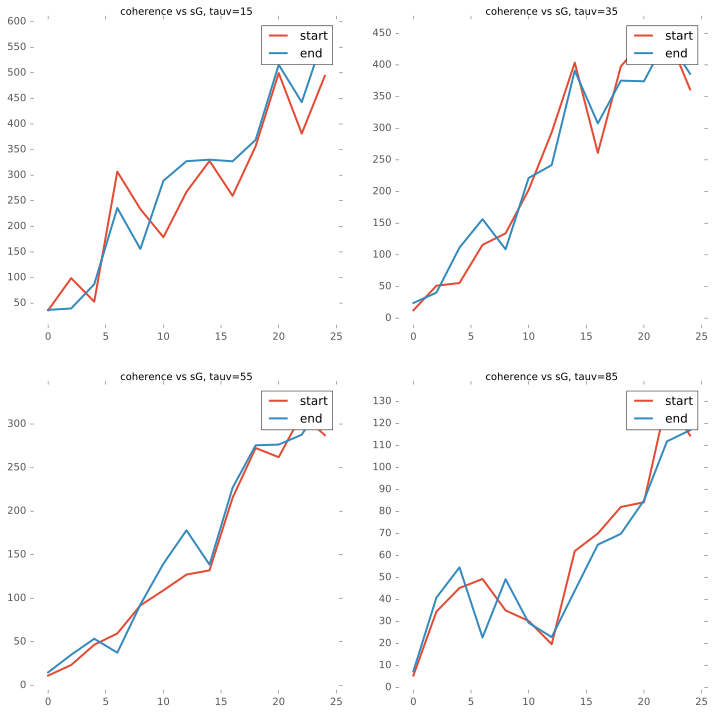

In [34]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
gr.plotSGCoherence(df,tauv=15, ax=ax1, LTD=False)
gr.plotSGCoherence(df,tauv=35, ax=ax2,LTD=False)
gr.plotSGCoherence(df,tauv=55, ax=ax3, LTD=False)
gr.plotSGCoherence(df,tauv=85, ax=ax4, LTD=False)
plt.savefig(DIRECTORY + 'corSG-noplast.png')

In [35]:
# c.tauv = 85
# c.sG = 5
# c.sWII = 10
# c.readSimulation()
# gr.plotWeights(c.tauv)

In [36]:
print(gr.fourier(c.i1[0:4000]))
print(gr.fourier(c.i2[0:4000]))
print(gr.fourier(c.i1[-4000:-1]))
print(gr.fourier(c.i2[-4000:-1]))

[33.966033966033969, 29.022446444639328]
[33.966033966033969, 20.660244486406615]
[35.964035964035965, 27.18931925313434]
[35.964035964035965, 17.373486967352502]


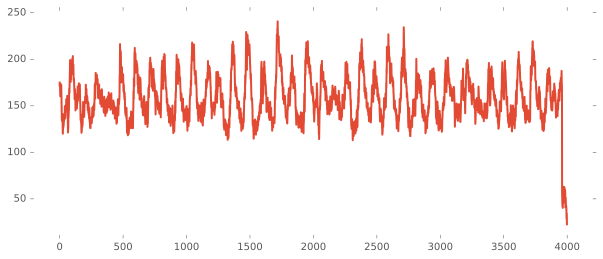

In [40]:
plt.plot(c.i2[-4000:-1])

In [27]:
df.head()

,tauv,d2,sWII,sG,LTD,maxBegin,argmaxBegin,maxEnd,argmaxEnd,f1Begin,p1Begin,f2Begin,p2Begin,f1End,p1End,f2End,p2End,key


In [47]:
# def plotCoherenceEvolution(dataframe, kind='max', sWII=10, LTD=True):
#     fig = plt.figure(figsize=(14,6))
    
#     df = dataframe
#     df = df[(df['LTD']==LTD) & (df['sWII']==10)]
#     extent = [np.min(df['sG']), np.max(df['sG']), np.min(df['tauv']), np.max(df['tauv'])]

#     ax1 = fig.add_subplot(121)
#     ax2 = fig.add_subplot(122)

#     cmap = plt.cm.RdBu_r
#     if kind=='max':
#         vmin = min( list(map(np.min, [df.maxBegin,df.maxEnd]))) 
#         vmax = max( list(map(np.max, [df.maxBegin,df.maxEnd]))) 
#     elif kind=='argmax':
#         vmin = min( list(map(np.min, [df.argmaxBegin,df.argmaxEnd]))) 
#         vmax = max( list(map(np.max, [df.argmaxBegin,df.argmaxEnd]))) 

#     title = r'Network %s N1: start'%kind
#     column = kind + 'Begin'
#     filename = column + '.pdf'
#     ax1, im = gr.plotDiagramCSD(fig, ax1, df, title, column, filename, extent=extent, cmap = cmap, 
#                                vmin=vmin, vmax=vmax)

#     title = r'Network %s N1: end'%kind
#     column = kind + 'End'
#     filename = column + '.pdf'
#     ax2, im = gr.plotDiagramCSD(fig, ax2, df, title, column, filename, extent=extent, cmap = cmap,
#                               vmin=vmin, vmax=vmax)

#     ax2.set_yticks([])
#     ax2.set_ylabel('')

#     fig.subplots_adjust(right=0.8)
#     cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.8])
#     fig.colorbar(im, cax=cbar_ax)

#     plt.savefig(DIRECTORY + kind + '_cluster_plast%s.pdf'%str(LTD))
    
# def plotEvolution(dataframe, kind='frequency', sWII=10, LTD=True):
#     fig = plt.figure(figsize=(14,12))
    
#     df = dataframe
#     df = df[(df['LTD']==LTD) & (df['sWII']==sWII)]
#     extent = [np.min(df['sG']), np.max(df['sG']), np.min(df['tauv']), np.max(df['tauv'])]


#     ax1 = fig.add_subplot(221)
#     ax2 = fig.add_subplot(222)
#     ax3 = fig.add_subplot(223)
#     ax4 = fig.add_subplot(224)

#     cmap = plt.cm.RdBu_r

#     if kind=='frequency':
#         vmin = min( list(map(np.min, [df.f1Begin,df.f2Begin,df.f1End, df.f2End]))) 
#         vmax = max( list(map(np.max, [df.f1Begin,df.f2Begin,df.f1End, df.f2End]))) 
#     else:
#         vmin = min( list(map(np.min, [df.p1Begin,df.p2Begin,df.p1End, df.p2End]))) 
#         vmax = max( list(map(np.max, [df.p1Begin,df.p2Begin,df.p1End, df.p2End]))) 

#     title = r'Network %s N1: start'%kind
#     column = kind[0] + '1Begin'
#     filename = column + '.pdf'
#     ax1, _ = gr.plotDiagramCSD(fig, ax1, df, title, column, filename, extent=extent, cmap = cmap, 
#                                vmin=vmin, vmax=vmax)
#     ax1.set_xticks([])
#     ax1.set_xlabel('')

#     title = r'Network %s N1: end'%kind
#     column = kind[0] + '1End'
#     filename = column + '.pdf'
#     ax2, _ = gr.plotDiagramCSD(fig, ax2, df, title, column, filename, extent=extent, cmap = cmap,
#                               vmin=vmin, vmax=vmax)
#     ax2.set_xticks([])
#     ax2.set_xlabel('')
#     ax2.set_yticks([])
#     ax2.set_ylabel('')

#     title = r'Network %s N2: start'%kind
#     column = kind[0] + '2Begin'
#     filename = column + '.pdf'
#     ax3, _ = gr.plotDiagramCSD(fig, ax3, df, title, column, filename, extent=extent, cmap = cmap,
#                               vmin=vmin, vmax=vmax)

#     title = r'Network %s N2: end' %kind
#     column = kind[0] + '2End'
#     filename = column + '.pdf'
#     ax4, im = gr.plotDiagramCSD(fig, ax4, df, title, column, filename, extent=extent, cmap = cmap,
#                                vmin=vmin, vmax=vmax)
#     ax4.set_yticks([])
#     ax4.set_ylabel('')

#     fig.subplots_adjust(right=0.9)
#     cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
#     fig.colorbar(im, cax=cbar_ax)

#     plt.savefig(DIRECTORY + kind+ '_cluster%s.pdf'%str(LTD))

(40, 13)
(40, 13)
(40, 13)
(40, 13)


0

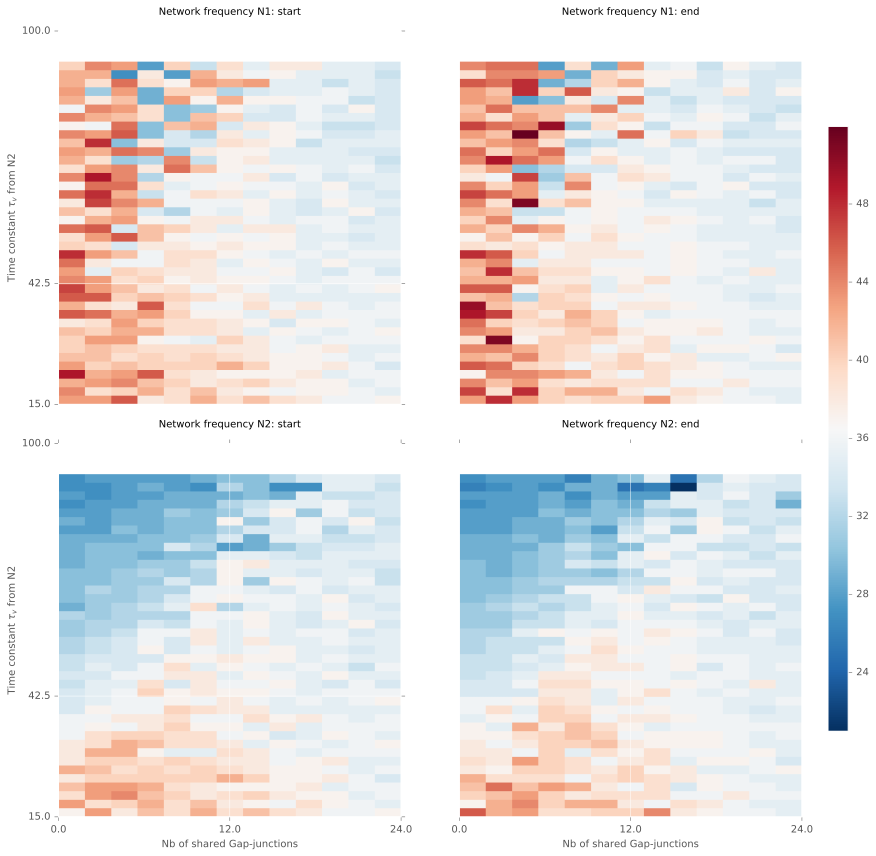

In [37]:
gr.plotEvolution(df, kind = 'frequency', LTD=False)

(40, 13)
(40, 13)
(40, 13)
(40, 13)


0

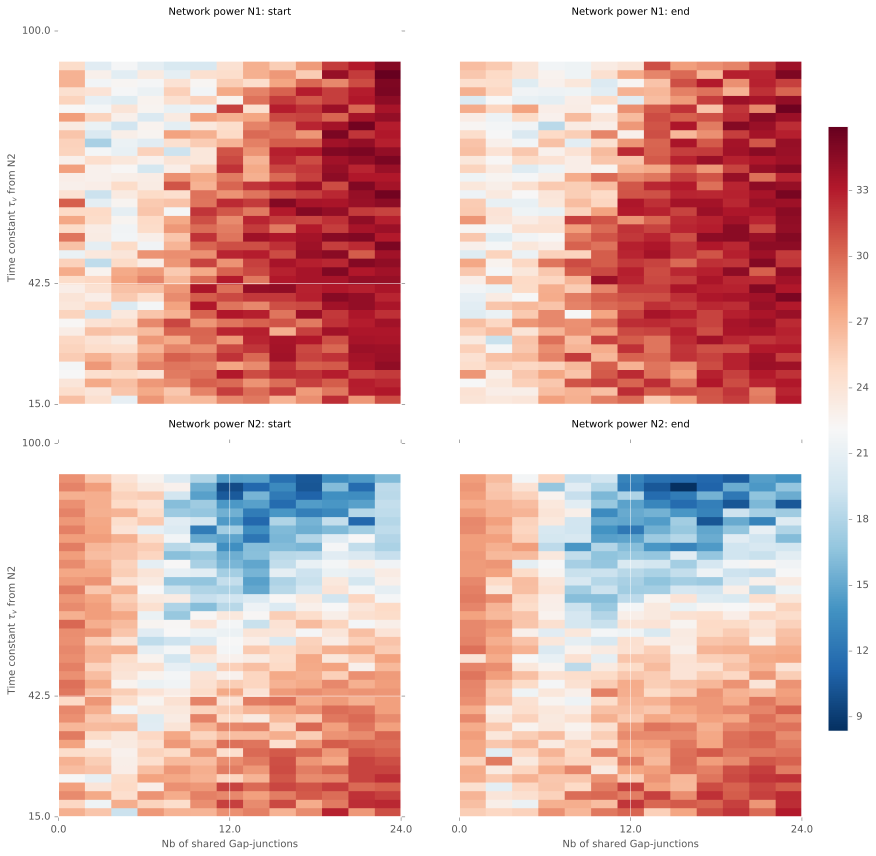

In [38]:
gr.plotEvolution(df, 'power', LTD=False)

(40, 13)
(40, 13)


0

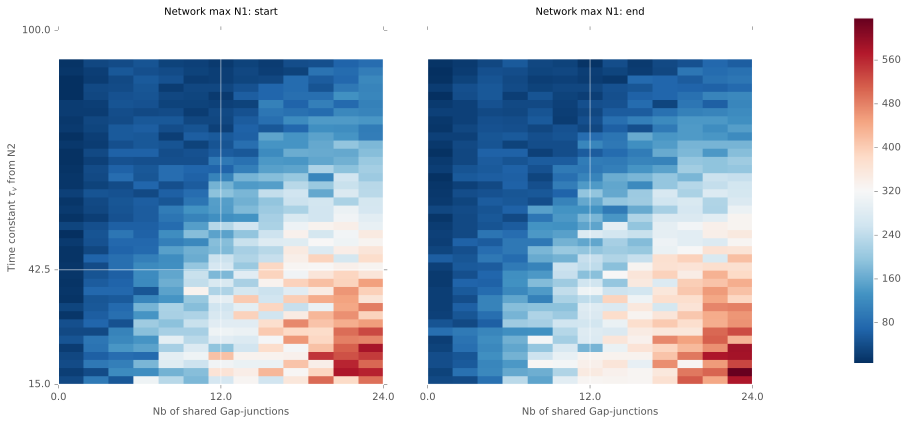

In [40]:
gr.plotCoherenceEvolution(df, kind='max', LTD=False)

(40, 13)
(40, 13)


0

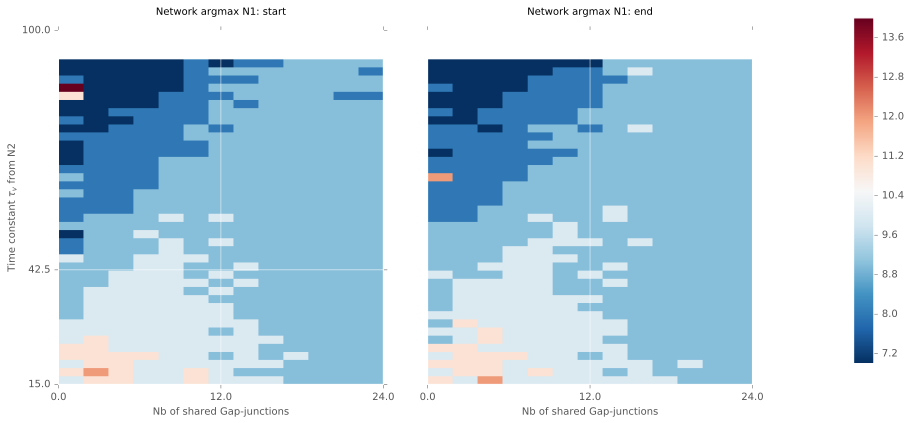

In [41]:
gr.plotCoherenceEvolution(df, kind='argmax', LTD=False)

In [ ]:
# def plotChange(dataframe, kind='max',network = '', both=None, vmin=None, vmax=None, sWII=10, title=""):
#     fig = plt.figure(figsize=(8,6))

    
#     df = dataframe
#     df = df[(df['LTD']==True)& (df['sWII']==sWII)]
#     extent = [np.min(df['sG']), np.max(df['sG']), np.min(df['tauv']), np.max(df['tauv'])]

#     ax1 = fig.add_subplot(111)

#     cmap = plt.cm.RdYlGn

#     title = r'%s'%(title)
#     column = kind + 'Begin'
#     filename = column + '.pdf'
#     ax1, im = gr.plotDiagramChangeCSD(fig, ax1, df, title, 
#                                       kind, filename, extent=extent, cmap = cmap, both=both,
#                                      vmin=vmin, vmax=vmax)

#     fig.subplots_adjust(right=0.95)
#     cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
#     cbar = fig.colorbar(im, cax=cbar_ax)

#     plt.savefig(DIRECTORY + kind + 'change_cluster.pdf')
    
# def plotChange2(dataframe, kind='max',network = '', title='', both=None, vmin=None, vmax=None, sWII=10):
#     fig = plt.figure(figsize=(8,12))
    
#     df = dataframe
#     df = df[(df['LTD']==True)& (df['sWII']==sWII)]
#     extent = [np.min(df['sG']), np.max(df['sG']), np.min(df['tauv']), np.max(df['tauv'])]

#     ax1 = fig.add_subplot(211)
#     ax2 = fig.add_subplot(212)
#     cmap = plt.cm.RdYlGn

#     title = r'%s'%(title)
#     column = kind + 'Begin'
#     filename = "".join(title.split(' ') )+ '.pdf'
#     ax1, im = gr.plotDiagramChangeCSD(fig, ax1, df, title, kind, filename, extent=extent, cmap = cmap,
#                                      both=both,
#                                      vmin=vmin, vmax=vmax)
    
#     title = r'%s'%(title)
#     column = kind[:-1] + '2Begin'
#     filename = "".join(title.split(' ') )+ '2.pdf'
#     ax2, im = gr.plotDiagramChangeCSD(fig, ax2, df, title, kind[:-1] + '2', filename, extent=extent, cmap = cmap,
#                                      both=both,
#                                      vmin=vmin, vmax=vmax)
    
#     ax2.set_title('')
#     ax1.set_xticks([])
#     ax1.set_xlabel("")
#     fig.subplots_adjust(right=0.95)
#     cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
#     cbar = fig.colorbar(im, cax=cbar_ax)
#     plt.tight_layout()
#     plt.savefig(DIRECTORY + kind + 'both_change_cluster.pdf')

/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


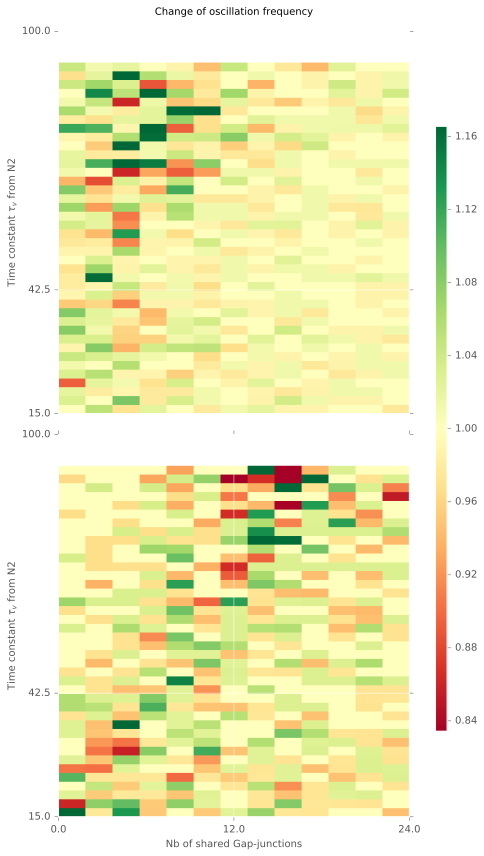

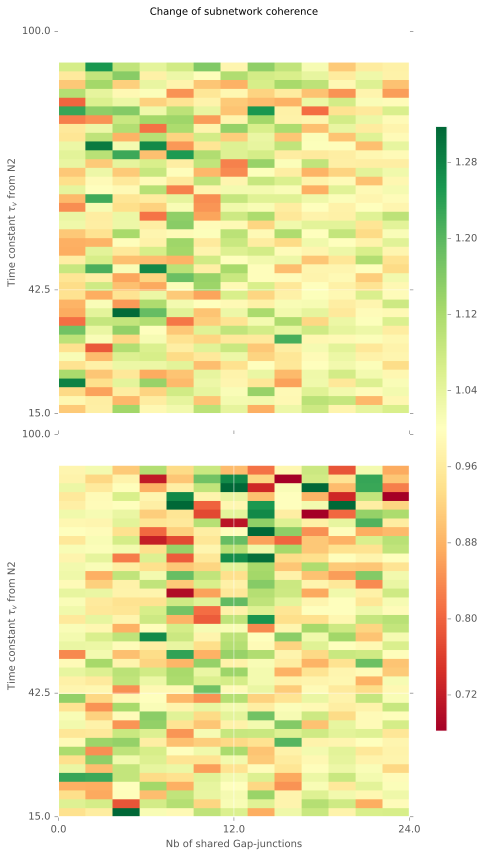

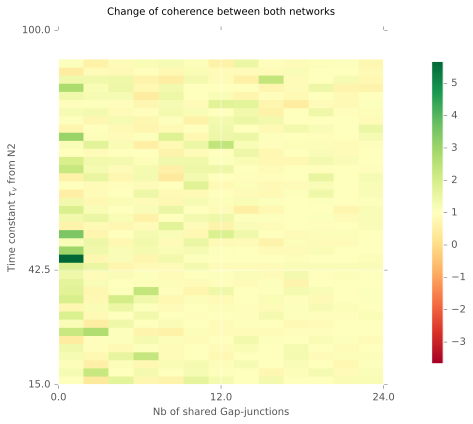

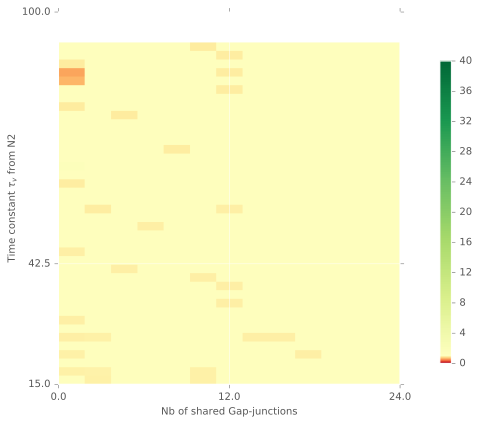

In [42]:
gr.plotChange2(df, 'f1', 'N1', both=True, title='Change of oscillation frequency', sWII=10, LTD=False)
gr.plotChange2(df, 'p1', 'N1', both=True, title='Change of subnetwork coherence', sWII=10, LTD=False)
# plotChange('f1', 'N1')
# plotChange('f1', 'N1', both=True)
# plotChange('f2', 'N2', both=True)
# plotChange('p1', 'N1', both=True)
# plotChange('p2', 'N2', both=True)
gr.plotChange(df, 'max', title="Change of coherence between both networks", LTD=False)
gr.plotChange(df, 'argmax', vmin=0, vmax=40, LTD=False)

In [44]:
c.WII

1400